<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 1st exercise: <font color="#C70039">Time Series Analysis and Local Outlier Factor</font>
* Course: <a href="https://www.gernotheisenberg.de/time_series_forecasting.html">Time Series Forecasting (TSF)</a>
* Lecturer: <a href="https://www.gernotheisenberg.de/uebermich.html">Gernot Heisenberg</a>
* Date:   15.02.2025

<img src="./images/decomposed_ts.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION OF THE NOTEBOOK CONTENT</font>:
This notebook allows you for getting into the handling of time series, including visualization of the rolling statistics as well as the local outlier factor as anomaly detection method. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * understand the output
4. load your own time series data set
    * explore the code and the functionality
    * play around
-----------------------------------------------------------------------------------

### I. Rolling statistics section

In [2]:
import pandas as pd

#### Moving Average

In [3]:
data = {'Time': [1, 2, 3, 4, 5], 'Value': [10, 12, 15, 18, 22]}
df = pd.DataFrame(data)
df['Moving_Avg'] = df['Value'].rolling(window=2).mean()
print(df)

   Time  Value  Moving_Avg
0     1     10         NaN
1     2     12        11.0
2     3     15        13.5
3     4     18        16.5
4     5     22        20.0


##### <font color="ce33ff">TASK</font>: take your own time series and also visualize the result as a chart

#### Exponential Moving Average

In [13]:
data = {'Time': [1, 2, 3, 4, 5], 'Value': [10, 12, 15, 18, 22]}
df = pd.DataFrame(data)
df['EMA'] = df['Value'].ewm(span=2, adjust=False).mean()
print(df)

   Time  Value        EMA
0     1     10  10.000000
1     2     12  11.333333
2     3     15  13.777778
3     4     18  16.592593
4     5     22  20.197531


##### <font color="ce33ff">TASK</font>: take your own time series and also visualize the result as a chart

#### Variance

In [14]:
data = [10, 12, 23, 23, 16, 23, 21, 16]
variance = np.var(data)
std_dev = np.sqrt(variance)
print(f'Variance: {variance}, Standard Deviation: {std_dev}')

Variance: 24.0, Standard Deviation: 4.898979485566356


##### <font color="ce33ff">TASK</font>: take your own time series and compute

#### Skewness

In [4]:
import scipy.stats as stats
import numpy as np

data = np.random.gamma(2., 2., 1000)
skewness = stats.skew(data)
print(f'Skewness: {skewness}')

Skewness: 1.6250073947231487


##### <font color="ce33ff">TASK</font>: take your own time series and compute 

#### Kurtosis

In [5]:
data = np.random.normal(0, 1, 1000)
kurtosis = stats.kurtosis(data)
print(f'Kurtosis: {kurtosis}')

Kurtosis: -0.24879835744982648


##### <font color="ce33ff">TASK</font>: take your own time series and compute 

### II. Local Outlier Factor section

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

#### Create the time series data containing outliers

In [7]:
# Generate synthetic time series data
np.random.seed(42)
time = np.arange(100)
values = np.sin(time / 5) + np.random.normal(scale=0.2, size=100)

# Introduce some artificial outliers
values[[10, 50, 90]] = values[[10, 50, 90]] + np.array([3, -3, 3])

# Convert into a DataFrame
df = pd.DataFrame({'time': time, 'value': values})

#### Detect the outliers using LOF

In [8]:
# Apply LOF for outlier detection
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df['outlier'] = lof.fit_predict(df[['value']])

# Identify outliers (-1 means outlier, 1 means inlier)
outliers = df[df['outlier'] == -1]

#### Visualize the detected outliers

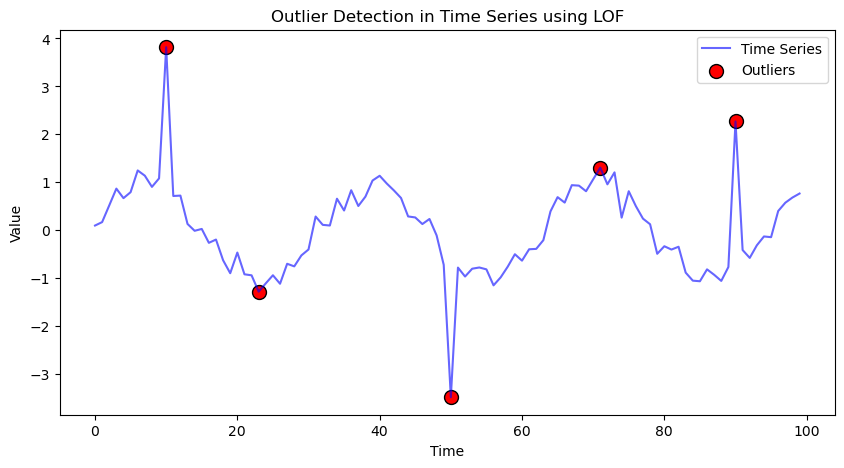

In [9]:
# Plot the time series with outliers highlighted
plt.figure(figsize=(10, 5))
plt.plot(df['time'], df['value'], label="Time Series", color='blue', alpha=0.6)
plt.scatter(outliers['time'], outliers['value'], color='red', label="Outliers", marker='o', edgecolors='k', s=100)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Outlier Detection in Time Series using LOF")
plt.legend()
plt.show()

##### <font color="ce33ff">TASK</font>: take your own time series and detect the outliers with LOF